In [1]:
# Importing and analysis
import requests
import pandas as pd 
import numpy as np

# Statistics
import scipy.stats as stats
from scipy.stats import spearmanr
from scipy.stats import kruskal
import scikit_posthocs as sp

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Significance of Microbiome cohorts

In [2]:
# Load the data
Endo_data = pd.read_csv("All data_for stats.csv") 
Endo_data

,Micro sample,Study number,Microbiome cohort,"Antibiotics (0=no, 1=yes)","Endometrioma (0=no, 1=yes)","Peritoneal endo (0=no, 1=yes)",Clinical groups (1-5),Clinical groups ( 1-3),Clinical groups ( 1-2),Cycle length,...,Streptococcus phage phiARI0131-2,Streptococcus phage phiARI0462,Streptococcus phage phiARI0468-4,Streptococcus phage phiARI0746,Streptococcus phage phiARI0923,Streptococcus phage phiBHN167,Streptococcus phage phiNJ2,Streptococcus virus Sfi19,Streptococcus virus Sfi21,uncultured crAssphage
0,01_CP04716,31,1,0.0,NaN,0.0,1,1,1,34.0,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.0000,0.00000
1,02_CP04716,33,2,1.0,0.0,0.0,1,1,1,NaN,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.0000,0.00000
2,03_CP04716,52,3,NaN,NaN,0.0,1,1,1,27.0,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.0000,0.00000
3,04_CP04716,53,1,NaN,NaN,NaN,2,2,2,NaN,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.0000,0.00000
4,05_CP04716,54,1,NaN,1.0,1.0,4,3,2,NaN,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.0000,0.00000
5,07_CP04716,28,4,0.0,0.0,0.0,1,1,1,28.0,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.0000,0.00000
6,08_CP04716,29,3,0.0,1.0,1.0,4,3,2,29.0,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.0000,0.00000
7,09_CP04716,30,1,0.0,0.0,1.0,2,2,2,28.0,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.0000,0.00000
8,10_CP04716,34,4,1.0,1.0,1.0,5,3,2,28.0,...,0.00086,0.02337,0.00399,0.01414,0.00152,0.0018,0.00000,0.00000,0.0000,0.00000
9,11_CP04716,35,1,0.0,0.0,1.0,2,2,2,NaN,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.0000,0.00000


In [3]:
# Relationships of microbiome cohorts with everything (no microbiome, that is done separately with CosmosID)
# I need to remove null values from each analysis, so I cannot do it per multiple columns unfortunately

In [4]:
# Antibiotic use - Antibiotics (0=no, 1=yes)
Endo_data1 = Endo_data[['Microbiome cohort', 'Antibiotics (0=no, 1=yes)']]
Endo_data1
# Remove null values
Endo_data2 = Endo_data1.dropna()
Endo_data2
# Chi-squared test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(pd.crosstab(Endo_data2['Microbiome cohort'], Endo_data2['Antibiotics (0=no, 1=yes)']))
print("Chi-Squared Test:")
print(f"Chi2 Statistic: {chi2_stat}")
print(f"P-value: {p_val}")

Chi-Squared Test:
Chi2 Statistic: 12.240942028985508
P-value: 0.006601761209329821


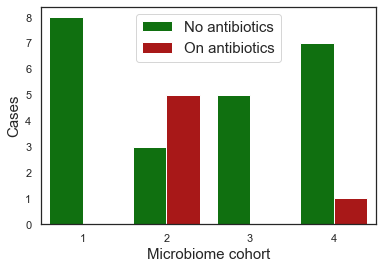

In [37]:
# graph it
#sns.countplot(x="Microbiome cohort", hue='Antibiotics (0=no, 1=yes)', data=Endo_data)
#plt.legend(loc="upper right", title= 'Microbiome cohort and Antibiotics (0=no, 1=yes)', labels=["No", "Yes"], fontsize=12)


sns.set(font_scale=1.0)
colors = ["#008000", "#C00000"]
sns.set_style(style='white')
sns.set_palette(sns.color_palette(colors))
sns.countplot(x="Microbiome cohort", hue="Antibiotics (0=no, 1=yes)", data=Endo_data)
plt.xlabel("Microbiome cohort", fontsize=15)
plt.ylabel("Cases", fontsize=15)
plt.legend(loc="upper center", labels=["No antibiotics", "On antibiotics"], fontsize=15)
sns.set(font="Arial")
plt.show()

In [6]:
# Endometrioma (0=no, 1=yes)
Endo_data1 = Endo_data[['Microbiome cohort', 'Endometrioma (0=no, 1=yes)']]
Endo_data1
# Remove null values
Endo_data2 = Endo_data1.dropna()
Endo_data2
# Chi-squared test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(pd.crosstab(Endo_data2['Microbiome cohort'], Endo_data2['Endometrioma (0=no, 1=yes)']))
print("Chi-Squared Test:")
print(f"Chi2 Statistic: {chi2_stat}")
print(f"P-value: {p_val}")

Chi-Squared Test:
Chi2 Statistic: 5.3211050724637685
P-value: 0.14973876243414577


In [7]:
# Peritoneal endo (0=no, 1=yes)
Endo_data1 = Endo_data[['Microbiome cohort', 'Peritoneal endo (0=no, 1=yes)']]
Endo_data1
# Remove null values
Endo_data2 = Endo_data1.dropna()
Endo_data2
# Chi-squared test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(pd.crosstab(Endo_data2['Microbiome cohort'], Endo_data2['Peritoneal endo (0=no, 1=yes)']))
print("Chi-Squared Test:")
print(f"Chi2 Statistic: {chi2_stat}")
print(f"P-value: {p_val}")

Chi-Squared Test:
Chi2 Statistic: 1.7024216524216522
P-value: 0.6363955411234912


In [8]:
# Clinical groups (1-5)
Endo_data1 = Endo_data[['Microbiome cohort', 'Clinical groups (1-5)']]
Endo_data1
# Remove null values
Endo_data2 = Endo_data1.dropna()
Endo_data2
# Chi-squared test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(pd.crosstab(Endo_data2['Microbiome cohort'], Endo_data2['Clinical groups (1-5)']))
print("Chi-Squared Test:")
print(f"Chi2 Statistic: {chi2_stat}")
print(f"P-value: {p_val}")

Chi-Squared Test:
Chi2 Statistic: 16.868281815650235
P-value: 0.15461964958033278


In [9]:
# Clinical groups ( 1-3)
Endo_data1 = Endo_data[['Microbiome cohort', 'Clinical groups ( 1-3)']]
Endo_data1
# Remove null values
Endo_data2 = Endo_data1.dropna()
Endo_data2
# Chi-squared test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(pd.crosstab(Endo_data2['Microbiome cohort'], Endo_data2['Clinical groups ( 1-3)']))
print("Chi-Squared Test:")
print(f"Chi2 Statistic: {chi2_stat}")
print(f"P-value: {p_val}")

Chi-Squared Test:
Chi2 Statistic: 7.886656034024456
P-value: 0.24652537089825174


In [10]:
# Clinical groups ( 1-2)
Endo_data1 = Endo_data[['Microbiome cohort', 'Clinical groups ( 1-2)']]
Endo_data1
# Remove null values
Endo_data2 = Endo_data1.dropna()
Endo_data2
# Chi-squared test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(pd.crosstab(Endo_data2['Microbiome cohort'], Endo_data2['Clinical groups ( 1-2)']))
print("Chi-Squared Test:")
print(f"Chi2 Statistic: {chi2_stat}")
print(f"P-value: {p_val}")

Chi-Squared Test:
Chi2 Statistic: 6.360345307713729
P-value: 0.09533587670947591


In [11]:
# Cycle length
Endo_data1 = Endo_data[['Microbiome cohort', 'Cycle length']]
Endo_data1
# Remove null values
Endo_data2 = Endo_data1.dropna()
Endo_data2
# Kruskal Wallis test
groups = Endo_data2['Microbiome cohort'].unique()
group_data = [Endo_data2[Endo_data2['Microbiome cohort'] == group]['Cycle length'] for group in groups]
kruskal_stat, p_val = stats.kruskal(*group_data)
print("Kruskal Wallis results:")
print(f"F-value: {kruskal_stat}")
print(f"P-value: {p_val}")

Kruskal Wallis results:
F-value: 6.218306412139004
P-value: 0.10145895170347423


In [12]:
# Phase of cycle (0:follicular; 1:mid-luteal)
Endo_data1 = Endo_data[['Microbiome cohort', 'Phase of cycle (0:follicular; 1:mid-luteal)']]
Endo_data1
# Remove null values
Endo_data2 = Endo_data1.dropna()
Endo_data2
# Chi-squared test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(pd.crosstab(Endo_data2['Microbiome cohort'], Endo_data2['Phase of cycle (0:follicular; 1:mid-luteal)']))
print("Chi-Squared Test:")
print(f"Chi2 Statistic: {chi2_stat}")
print(f"P-value: {p_val}")

Chi-Squared Test:
Chi2 Statistic: 5.475515334338865
P-value: 0.1401104279054239


In [13]:
# LH (IU/L)
Endo_data1 = Endo_data[['Microbiome cohort', 'LH (IU/L)']]
Endo_data1
# Remove null values
Endo_data2 = Endo_data1.dropna()
Endo_data2
# Kruskal Wallis test
groups = Endo_data2['Microbiome cohort'].unique()
group_data = [Endo_data2[Endo_data2['Microbiome cohort'] == group]['LH (IU/L)'] for group in groups]
kruskal_stat, p_val = stats.kruskal(*group_data)
print("Kruskal Wallis results:")
print(f"F-value: {kruskal_stat}")
print(f"P-value: {p_val}")

Kruskal Wallis results:
F-value: 5.30285714285715
P-value: 0.15091710283420812


In [14]:
# FSH (U/L)
Endo_data1 = Endo_data[['Microbiome cohort', 'FSH (U/L)']]
Endo_data1
# Remove null values
Endo_data2 = Endo_data1.dropna()
Endo_data2
# Kruskal Wallis test
groups = Endo_data2['Microbiome cohort'].unique()
group_data = [Endo_data2[Endo_data2['Microbiome cohort'] == group]['FSH (U/L)'] for group in groups]
kruskal_stat, p_val = stats.kruskal(*group_data)
print("Kruskal Wallis results:")
print(f"F-value: {kruskal_stat}")
print(f"P-value: {p_val}")

Kruskal Wallis results:
F-value: 2.2657538404071587
P-value: 0.519113289592168


In [15]:
# Insulin (mU/L)
Endo_data1 = Endo_data[['Microbiome cohort', 'Insulin (mU/L)']]
Endo_data1
# Remove null values
Endo_data2 = Endo_data1.dropna()
Endo_data2
# Kruskal Wallis test
groups = Endo_data2['Microbiome cohort'].unique()
group_data = [Endo_data2[Endo_data2['Microbiome cohort'] == group]['Insulin (mU/L)'] for group in groups]
kruskal_stat, p_val = stats.kruskal(*group_data)
print("Kruskal Wallis results:")
print(f"F-value: {kruskal_stat}")
print(f"P-value: {p_val}")

Kruskal Wallis results:
F-value: 1.5148412698412699
P-value: 0.6788492335634441


In [16]:
# Progesterone (nmol/L)
Endo_data1 = Endo_data[['Microbiome cohort', 'Progesterone (nmol/L)']]
Endo_data1
# Remove null values
Endo_data2 = Endo_data1.dropna()
Endo_data2
# Kruskal Wallis test
groups = Endo_data2['Microbiome cohort'].unique()
group_data = [Endo_data2[Endo_data2['Microbiome cohort'] == group]['Progesterone (nmol/L)'] for group in groups]
kruskal_stat, p_val = stats.kruskal(*group_data)
print("Kruskal Wallis results:")
print(f"F-value: {kruskal_stat}")
print(f"P-value: {p_val}")

Kruskal Wallis results:
F-value: 4.169073165030397
P-value: 0.24377654535249835


In [17]:
# Fasting glucose(mmol/L)
Endo_data1 = Endo_data[['Microbiome cohort', 'Fasting glucose(mmol/L)']]
Endo_data1
# Remove null values
Endo_data2 = Endo_data1.dropna()
Endo_data2
# Kruskal Wallis test
groups = Endo_data2['Microbiome cohort'].unique()
group_data = [Endo_data2[Endo_data2['Microbiome cohort'] == group]['Fasting glucose(mmol/L)'] for group in groups]
kruskal_stat, p_val = stats.kruskal(*group_data)
print("Kruskal Wallis results:")
print(f"F-value: {kruskal_stat}")
print(f"P-value: {p_val}")

Kruskal Wallis results:
F-value: 4.0280258700338845
P-value: 0.2584537016928909


In [18]:
# Hb1A1c (mmol/mol)
Endo_data1 = Endo_data[['Microbiome cohort', 'Hb1A1c (mmol/mol)']]
Endo_data1
# Remove null values
Endo_data2 = Endo_data1.dropna()
Endo_data2
# Kruskal Wallis test
groups = Endo_data2['Microbiome cohort'].unique()
group_data = [Endo_data2[Endo_data2['Microbiome cohort'] == group]['Hb1A1c (mmol/mol)'] for group in groups]
kruskal_stat, p_val = stats.kruskal(*group_data)
print("Kruskal Wallis results:")
print(f"F-value: {kruskal_stat}")
print(f"P-value: {p_val}")

Kruskal Wallis results:
F-value: 2.358865300506158
P-value: 0.5013377617464223


In [19]:
# Oestradiol  (pmol/L)
Endo_data1 = Endo_data[['Microbiome cohort', 'Oestradiol  (pmol/L)']]
Endo_data1
# Remove null values
Endo_data2 = Endo_data1.dropna()
Endo_data2
# Kruskal Wallis test
groups = Endo_data2['Microbiome cohort'].unique()
group_data = [Endo_data2[Endo_data2['Microbiome cohort'] == group]['Oestradiol  (pmol/L)'] for group in groups]
kruskal_stat, p_val = stats.kruskal(*group_data)
print("Kruskal Wallis results:")
print(f"F-value: {kruskal_stat}")
print(f"P-value: {p_val}")

Kruskal Wallis results:
F-value: 7.020229885057475
P-value: 0.07125576482507602


In [20]:
# Oestrad/Prog ratio
Endo_data1 = Endo_data[['Microbiome cohort', 'Oestrad/Prog ratio']]
Endo_data1
# Remove null values
Endo_data2 = Endo_data1.dropna()
Endo_data2
# Kruskal Wallis test
groups = Endo_data2['Microbiome cohort'].unique()
group_data = [Endo_data2[Endo_data2['Microbiome cohort'] == group]['Oestrad/Prog ratio'] for group in groups]
kruskal_stat, p_val = stats.kruskal(*group_data)
print("Kruskal Wallis results:")
print(f"F-value: {kruskal_stat}")
print(f"P-value: {p_val}")

Kruskal Wallis results:
F-value: 1.3700176366842953
P-value: 0.7125775648127086


In [21]:
# Oestrad/Prog ratio only luteal phase
Endo_data1 = Endo_data[['Microbiome cohort', 'Oestrad/Prog ratio only luteal phase']]
Endo_data1
# Remove null values
Endo_data2 = Endo_data1.dropna()
Endo_data2
# Kruskal Wallis test
groups = Endo_data2['Microbiome cohort'].unique()
group_data = [Endo_data2[Endo_data2['Microbiome cohort'] == group]['Oestrad/Prog ratio only luteal phase'] for group in groups]
kruskal_stat, p_val = stats.kruskal(*group_data)
print("Kruskal Wallis results:")
print(f"F-value: {kruskal_stat}")
print(f"P-value: {p_val}")

Kruskal Wallis results:
F-value: 0.13025210084033034
P-value: 0.9879748955696159


In [22]:
# Age
Endo_data1 = Endo_data[['Microbiome cohort', 'Age']]
Endo_data1
# Remove null values
Endo_data2 = Endo_data1.dropna()
Endo_data2
# Kruskal Wallis test
groups = Endo_data2['Microbiome cohort'].unique()
group_data = [Endo_data2[Endo_data2['Microbiome cohort'] == group]['Age'] for group in groups]
kruskal_stat, p_val = stats.kruskal(*group_data)
print("Kruskal Wallis results:")
print(f"F-value: {kruskal_stat}")
print(f"P-value: {p_val}")

Kruskal Wallis results:
F-value: 6.474946734259067
P-value: 0.09065579649447787


In [23]:
# BMI
Endo_data1 = Endo_data[['Microbiome cohort', 'BMI']]
Endo_data1
# Remove null values
Endo_data2 = Endo_data1.dropna()
Endo_data2
# Kruskal Wallis test
groups = Endo_data2['Microbiome cohort'].unique()
group_data = [Endo_data2[Endo_data2['Microbiome cohort'] == group]['BMI'] for group in groups]
kruskal_stat, p_val = stats.kruskal(*group_data)
print("Kruskal Wallis results:")
print(f"F-value: {kruskal_stat}")
print(f"P-value: {p_val}")

Kruskal Wallis results:
F-value: 2.927137470702132
P-value: 0.4029961095271727


In [24]:
# Inflammatory gyecological conditions (0=no, 1= yes)
Endo_data1 = Endo_data[['Microbiome cohort', 'Inflammatory gyecological conditions (0=no, 1= yes)']]
Endo_data1
# Remove null values
Endo_data2 = Endo_data1.dropna()
Endo_data2
# Chi-squared test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(pd.crosstab(Endo_data2['Microbiome cohort'], Endo_data2['Inflammatory gyecological conditions (0=no, 1= yes)']))
print("Chi-Squared Test:")
print(f"Chi2 Statistic: {chi2_stat}")
print(f"P-value: {p_val}")

Chi-Squared Test:
Chi2 Statistic: 2.8282828282828283
P-value: 0.41886519806349


In [25]:
# All glycans = in batches as dif missing glycans in each cohort, uncorrected for multiple glycan peaks
# Load the data - serum IgG glycans
Endo_data_IgGserumglycans = pd.read_csv("All data_for stats2_serum_IgGglycans.csv") 
Endo_data_IgGserumglycans

,Microbiome cohort,Serum_IgG_GP1,Serum_IgG_GP2,Serum_IgG_GP3,Serum_IgG_GP4,Serum_IgG_GP5,Serum_IgG_GP6,Serum_IgG_GP7,Serum_IgG_GP8,Serum_IgG_GP9,...,Serum_IgG_S1,Serum_IgG_S2,Serum_IgG_G0,Serum_IgG_G1,Serum_IgG_G2,Serum_IgG_A1,Serum_IgG_A2,Serum_IgG_oligomannose,Serum_IgG_Core Fucose,Serum_IgG_Bisects
0,1,0.0613,0.3004,0.0272,10.7336,0.0468,2.5385,0.2856,0.5485,16.3028,...,25.2008,7.5883,13.7078,34.0105,52.1340,0.0613,99.7442,0.0234,93.0568,15.0813
1,1,0.0833,0.8496,0.1238,16.6179,0.0949,5.0851,0.5424,0.6398,18.6416,...,14.0312,3.0392,22.8546,37.3560,39.6885,0.0833,99.7209,0.0475,92.5157,17.4661
2,1,0.0638,0.3737,0.0786,10.0552,0.0515,3.0425,0.3529,0.5128,19.4798,...,18.2645,3.2637,13.6653,37.6389,48.6070,0.0638,99.7959,0.0258,93.9628,14.6590
3,1,0.0542,0.3694,0.0109,8.6912,0.0793,2.8623,0.3834,0.4368,13.7296,...,24.4534,11.4020,12.0673,30.7959,56.6886,0.0542,99.4183,0.0397,89.2855,19.5086
4,1,0.0619,0.5796,0.0104,7.5313,0.0392,3.6652,0.5532,0.5016,15.0165,...,22.8858,10.3125,11.8876,29.3131,58.2387,0.0619,99.3383,0.0196,86.1921,18.2656
5,1,0.0523,0.9717,0.0476,15.2052,0.0888,5.0922,0.7536,0.8840,19.4860,...,17.3882,4.6847,21.4578,38.6698,39.8421,0.0523,99.8286,0.0444,91.3413,19.4720
6,1,0.1561,0.6753,0.1289,18.0451,0.0710,3.2334,0.3452,0.7545,19.5036,...,16.5834,6.8609,22.3098,37.6936,39.9336,0.1561,99.7099,0.0355,93.8488,14.7389
7,1,0.0101,0.5748,0.0365,11.4034,0.0562,4.1826,0.4883,0.4456,13.5993,...,22.9006,11.7763,16.2636,30.9620,52.0849,0.0101,99.2442,0.0281,86.8610,21.4081
8,1,0.0580,0.5471,0.0073,18.0617,0.0602,4.9659,0.3710,0.5248,16.5474,...,18.3186,9.8815,23.7002,34.4674,41.4975,0.0580,99.5469,0.0301,90.8519,20.4917
9,1,0.0764,0.6808,0.1168,16.3700,0.0942,4.2000,0.5356,0.5903,20.4545,...,15.3723,3.1175,21.5382,39.5406,38.8379,0.0764,99.7461,0.0471,93.6235,14.8329


In [33]:
# Kruskal Wallis test on glycans - serum IgG group
# Get unique groups
groups = Endo_data_IgGserumglycans['Microbiome cohort'].unique()

# Select all columns except the grouping column
columns_to_compare = Endo_data_IgGserumglycans.columns.difference(['Microbiome cohort'])

# Initialize an empty list to store the results
results = []

# Initialize an empty dataframe to store the results
results_df = pd.DataFrame(columns=['Column', 'Kruskal-Wallis statistic', 'P-value'])

# Perform Kruskal-Wallis test for each column
for column in columns_to_compare:
    group_data = [Endo_data_IgGserumglycans[Endo_data_IgGserumglycans['Microbiome cohort'] == group][column] for group in groups]
    kruskal_stat, p_val = stats.kruskal(*group_data)
    results.append((column, kruskal_stat, p_val))

# Convert the list of tuples to a DataFrame
results_df = pd.DataFrame(results, columns=['Column', 'Kruskal-Wallis statistic', 'P-value'])

# Filter dataframe for significant values (p-value < 0.05)
significant_results_df = results_df[results_df['P-value'] < 0.05]

# Print or display the filtered dataframe
print(significant_results_df)

# after correction for multiple peak testing 28xGPs (p<0.0018) and 11xfeatures (p<0.0045) nothing stays significant

           Column  Kruskal-Wallis statistic   P-value
18  Serum_IgG_GP2                  8.765373  0.032579


In [27]:
# Load the data - serum glycans
Endo_data_serumglycans = pd.read_csv("All data_for stats2_glycans_serumglycans.csv") 
Endo_data_serumglycans

,Microbiome cohort,Whole serum_GP1,Whole serum_GP2,Whole serum_GP3,Whole serum_GP4,Whole serum_GP5,Whole serum_GP6,Whole serum_GP7,Whole serum_GP8,Whole serum_GP9,...,Whole serum_G2,Whole serum_G3,Whole serum_G4,Whole serum_A1,Whole serum_A2,Whole serum_A3,Whole serum_A4,Whole serum_oligomannose,Whole serum_Core fucose,Whole serum_Outer arm fucose
0,1,0.0007,0.4996,0.0732,0.0196,0.3174,0.6525,1.4771,1.4256,0.0541,...,67.810,9.7600,8.5100,1.6400,76.4900,9.7629,8.5100,4.2000,24.7800,3.6400
1,1,0.0041,0.0384,0.0373,0.0084,0.0461,0.0955,1.0544,1.7539,0.0693,...,68.660,13.0600,6.1100,0.9300,75.8400,13.0620,6.1100,4.1800,24.4400,3.2400
2,1,0.0041,0.0293,0.0213,0.0053,0.0293,0.0740,0.9094,1.5381,0.0591,...,68.140,12.5500,7.4000,0.8700,75.4900,12.5457,7.4000,3.8000,28.7500,3.2800
3,1,0.0090,0.0345,0.0142,0.0048,0.0381,0.0708,0.5702,1.6216,0.0559,...,68.430,14.8900,5.9800,0.8100,74.1800,14.8910,5.9800,4.2800,22.4100,3.1600
4,1,0.0244,0.0170,0.0210,0.0061,0.0268,0.0669,0.4889,1.1833,0.0584,...,69.330,13.9400,7.4700,0.9000,74.4200,13.9387,7.4700,3.4000,21.7000,3.6900
5,1,0.0047,0.0393,0.0549,0.0131,0.0692,0.1502,0.9800,2.0422,0.1038,...,70.080,11.1100,4.8800,1.2100,77.9600,11.1127,4.8800,4.9900,29.2000,2.5500
6,1,0.0051,0.0172,0.0199,0.0136,0.0235,0.1088,1.4100,1.5691,0.0538,...,70.110,12.9200,4.5400,0.7600,78.0100,12.9191,4.5400,3.8800,26.1400,2.6200
7,1,0.0117,0.0264,0.0682,0.0131,0.1687,0.2233,1.2007,1.5904,0.1040,...,67.470,13.3500,6.7400,1.2500,74.9300,13.3477,6.7400,3.8300,25.0700,3.2000
8,1,0.0033,0.0190,0.0144,0.0080,0.0262,0.1337,0.9222,1.2658,0.0393,...,67.080,13.2300,9.6900,0.7400,72.7600,13.2343,9.6900,3.6700,19.5200,4.1100
9,1,0.0053,0.0167,0.0215,0.0051,0.0281,0.0593,0.8401,1.4084,0.0645,...,67.930,13.3700,8.6100,0.8300,73.9300,13.3692,8.6100,3.4000,20.7200,3.3800


In [28]:
# Kruskal Wallis test on glycans - serum group
# Get unique groups
groups = Endo_data_serumglycans['Microbiome cohort'].unique()

# Select all columns except the grouping column
columns_to_compare = Endo_data_serumglycans.columns.difference(['Microbiome cohort'])

# Initialize an empty list to store the results
results = []

# Initialize an empty dataframe to store the results
results_df = pd.DataFrame(columns=['Column', 'Kruskal-Wallis statistic', 'P-value'])

# Perform Kruskal-Wallis test for each column
for column in columns_to_compare:
    group_data = [Endo_data_serumglycans[Endo_data_serumglycans['Microbiome cohort'] == group][column] for group in groups]
    kruskal_stat, p_val = stats.kruskal(*group_data)
    results.append((column, kruskal_stat, p_val))

# Convert the list of tuples to a DataFrame
results_df = pd.DataFrame(results, columns=['Column', 'Kruskal-Wallis statistic', 'P-value'])

# Set pandas display options to show all rows
pd.set_option('display.max_rows', None)

# Filter dataframe for significant values (p-value < 0.05)
significant_results_df = results_df[results_df['P-value'] < 0.05]

# Print or display the filtered dataframe
print(significant_results_df)

# after correction for multiple peak testing 56xGPs (p<0.00089) and 17xfeatures (p<0.0029) nothing stays significant

              Column  Kruskal-Wallis statistic   P-value
39  Whole serum_GP36                  9.755398  0.020764


In [29]:
# Load the data - urine IgG glycans
Endo_data_urineIgGglycans = pd.read_csv("All data_for stats2_glycans_urineIgG.csv") 
Endo_data_urineIgGglycans

,Microbiome cohort,Urine_IgG_GP1,Urine_IgG_GP2,Urine_IgG_GP3,Urine_IgG_GP4,Urine_IgG_GP5,Urine_IgG_GP6,Urine_IgG_GP7,Urine_IgG_GP8,Urine_IgG_GP9,...,Urine_IgG_S1,Urine_IgG_S2,Urine_IgG_G0,Urine_IgG_G1,Urine_IgG_G2,Urine_IgG_A1,Urine_IgG_A2,Urine_IgG_oligomannose,Urine_IgG_Core Fucose,Urine_IgG_Bisects
0,1,0.0612,0.4883,0.0559,16.8963,0.2805,4.6971,1.0103,0.7481,15.9299,...,14.7694,5.8123,23.5057,34.4511,41.6837,0.5189,97.7841,1.3375,89.7332,24.6287
1,1,0.5802,0.3042,0.0565,8.0218,0.7928,3.8192,0.6531,0.3213,9.9372,...,22.0599,13.9620,15.6360,24.3468,59.5655,0.5943,95.8098,3.1442,80.4937,27.5011
2,1,1.1915,1.3220,0.1204,12.9242,0.7314,5.4636,0.7145,0.4062,12.7853,...,19.4575,10.0085,23.1018,26.5761,49.8692,1.9178,94.9535,2.6759,82.8158,28.0223
3,1,0.8413,0.2699,0.0484,17.2322,0.4278,2.7010,0.2587,0.1429,15.4971,...,16.9192,8.7413,21.7011,31.1674,46.9398,0.6906,98.0888,1.0290,91.8653,18.7098
4,1,0.2694,0.3320,0.0398,10.5031,0.2999,2.5319,0.8742,0.2690,15.3294,...,21.9007,9.7490,14.4301,28.8663,56.4889,0.4667,98.4300,0.8886,90.7456,19.5458
5,1,0.2636,0.1600,0.0291,12.3344,0.1849,2.8949,0.2789,0.0647,13.9471,...,19.4365,8.2875,16.1725,30.7164,52.8687,0.2918,98.8435,0.6223,94.7033,21.6548
6,1,0.3117,0.2692,0.0255,7.7465,0.4672,3.7157,0.4208,0.3539,9.5141,...,25.0956,12.8387,13.6177,22.9971,62.8199,0.4251,97.3047,1.7050,83.1501,29.4694
7,2,0.7472,0.8027,0.0640,12.6362,0.4842,4.6725,0.3705,0.3251,14.7316,...,19.5884,8.4701,19.9234,29.1865,50.7157,1.1763,97.2749,1.3744,89.6748,23.8653
8,2,0.8502,0.4201,0.3320,8.5989,0.3743,2.7280,0.4090,0.1910,12.2593,...,25.6315,13.0626,13.5459,23.2068,62.7953,0.8452,97.6610,1.0418,89.5733,21.1840
9,2,0.1731,0.4153,0.0121,10.6072,0.3753,3.7070,0.8872,0.4768,11.5407,...,21.4634,10.6188,18.0472,26.8296,54.6279,0.5019,95.7838,3.2191,82.7146,24.9870


In [30]:
# Kruskal Wallis test on glycans - urine IgG group 
# Get unique groups
groups = Endo_data_urineIgGglycans['Microbiome cohort'].unique()

# Select all columns except the grouping column
columns_to_compare = Endo_data_urineIgGglycans.columns.difference(['Microbiome cohort'])

# Initialize an empty list to store the results
results = []

# Initialize an empty dataframe to store the results
results_df = pd.DataFrame(columns=['Column', 'Kruskal-Wallis statistic', 'P-value'])

# Perform Kruskal-Wallis test for each column
for column in columns_to_compare:
    group_data = [Endo_data_urineIgGglycans[Endo_data_urineIgGglycans['Microbiome cohort'] == group][column] for group in groups]
    kruskal_stat, p_val = stats.kruskal(*group_data)
    results.append((column, kruskal_stat, p_val))

# Convert the list of tuples to a DataFrame
results_df = pd.DataFrame(results, columns=['Column', 'Kruskal-Wallis statistic', 'P-value'])

# Set pandas display options to show all rows
pd.set_option('display.max_rows', None)

# Filter dataframe for significant values (p-value < 0.05)
significant_results_df = results_df[results_df['P-value'] < 0.05]

# Print or display the filtered dataframe
print(significant_results_df)

# after correction for multiple peak testing 31xGPs (p< 0.0016) and 11xfeatures (p<0.0045) nothing stays significant

Empty DataFrame
Columns: [Column, Kruskal-Wallis statistic, P-value]
Index: []


In [31]:
# Load the data - urine glycans
Endo_data_urineglycans = pd.read_csv("All data_for stats2_glycans_urinewhole.csv") 
Endo_data_urineglycans

,Microbiome cohort,Whole_urine_GP1,Whole_urine_GP2,Whole_urine_GP3,Whole_urine_GP4,Whole_urine_GP5,Whole_urine_GP6,Whole_urine_GP7,Whole_urine_GP8,Whole_urine_GP9,...,Whole_urine_Galactosylated,Whole_urine_G0,Whole_urine_G1,Whole_urine_G2,Whole_urine_G3,Whole_urine_G4,Whole_urine_Sulfated,Whole_urine_Acetylated,Whole_urine_Polylac,Whole_urine_Galc
0,1,0.5382,0.4925,0.0706,0.4959,0.1103,0.1207,0.9069,0.8137,1.5561,...,85.4901,13.1766,10.2390,41.8058,17.7137,15.7316,4.1839,9.2496,21.5784,11.0173
1,1,2.4231,1.8688,0.0129,0.3504,0.1727,0.1515,1.0604,0.1993,3.2647,...,80.2404,19.4000,19.1243,42.8968,10.3263,7.8930,6.3219,7.0482,9.2898,14.8524
2,1,0.7909,0.8702,0.0726,0.2740,0.3286,0.1941,1.1607,1.2310,1.9596,...,83.4147,14.9753,12.3644,39.6259,17.2747,14.1497,4.2240,9.5109,21.2063,10.5983
3,1,1.5637,1.0406,0.0125,0.3810,0.2142,0.2029,1.2241,0.5324,3.1809,...,81.8682,17.6653,16.4767,40.6879,11.6244,13.0792,5.8094,5.5785,11.7958,14.6023
4,1,2.9878,1.7375,0.0958,0.4830,0.1871,0.3701,1.2249,0.4555,2.8439,...,80.4975,18.6935,16.1657,40.3576,12.0385,11.9357,5.3642,5.3158,11.8193,14.0237
5,1,0.8972,1.5091,0.0712,1.7697,1.1419,1.2884,4.8211,4.1304,3.5604,...,70.0511,28.0115,12.7657,32.0186,14.1955,11.0713,5.2690,7.2770,15.0821,8.7656
6,1,2.6280,1.7622,0.0343,0.4706,0.1871,0.3161,1.8518,0.5908,3.5236,...,78.8192,20.8056,18.6878,42.2589,9.8334,8.0391,6.2922,6.3872,8.6138,14.8666
7,1,1.5071,1.3325,0.0841,0.6815,0.4563,0.1599,4.1449,0.9357,4.4890,...,76.7467,22.7199,18.9647,40.3126,10.9692,6.5002,4.2203,9.4553,15.2606,10.7408
8,1,1.1253,0.7185,0.4493,1.5752,0.9192,0.7975,5.0349,4.9079,3.4020,...,71.0032,26.5214,12.7102,33.1189,8.9012,16.2729,3.3682,4.4406,12.3033,10.3702
9,1,0.6678,0.5563,0.1099,0.4968,0.2363,0.3330,1.8375,1.5964,2.1321,...,81.1697,17.4469,12.8758,38.3383,17.2737,12.6819,4.7319,9.1312,23.2198,11.1157


In [32]:
# Kruskal Wallis test on glycans - urine group
# Get unique groups
groups = Endo_data_urineglycans['Microbiome cohort'].unique()

# Select all columns except the grouping column
columns_to_compare = Endo_data_urineglycans.columns.difference(['Microbiome cohort'])

# Initialize an empty list to store the results
results = []

# Initialize an empty dataframe to store the results
results_df = pd.DataFrame(columns=['Column', 'Kruskal-Wallis statistic', 'P-value'])

# Perform Kruskal-Wallis test for each column
for column in columns_to_compare:
    group_data = [Endo_data_urineglycans[Endo_data_urineglycans['Microbiome cohort'] == group][column] for group in groups]
    kruskal_stat, p_val = stats.kruskal(*group_data)
    results.append((column, kruskal_stat, p_val))

# Convert the list of tuples to a DataFrame
results_df = pd.DataFrame(results, columns=['Column', 'Kruskal-Wallis statistic', 'P-value'])

# Set pandas display options to show all rows
pd.set_option('display.max_rows', None)

# Filter dataframe for significant values (p-value < 0.05)
significant_results_df = results_df[results_df['P-value'] < 0.05]

# Print or display the filtered dataframe
print(significant_results_df)

# after correction for multiple peak testing 58xGPs (p<0.00086) nothing stays significant

              Column  Kruskal-Wallis statistic   P-value
25  Whole_urine_GP23                   8.62762  0.034674
